**Extracting Column 5, and 6 from simulation data**

In [ ]:
import numpy as np
# file_name_matter='finalStateHadrons-Matter.dat'
file_name_matter='finalStateHadrons-Matter-100k.dat'
# file_name_matter_lbt='finalStateHadrons-MatterLbt.dat'
file_name_matter_lbt='finalStateHadrons-MatterLbt-100k.dat'
x_col_num=4
y_col_num=5
#hit_data_items=np.loadtxt(file_name, usecols=(4,5,))
#print(hit_data_items)
def extracting_hit_items(
    file_name,x_col_num,y_col_num):
    from google.colab import drive
    drive.mount('/content/drive')
    #file_directory_path= 'G:\\My Drive\\Projects\\110_JetscapeMl\\Hm.JetscapeMl.Data\\'
    file_directory_path= '/content/drive/MyDrive/Projects/110_JetscapeMl/Hm.JetscapeMl.Data/'
    hit_data_items=np.loadtxt(file_directory_path+file_name, usecols=(x_col_num,y_col_num,))
    return hit_data_items
hit_data_items_matter=extracting_hit_items(file_name_matter,x_col_num,y_col_num)
hit_data_items_matter_lbt=extracting_hit_items(file_name_matter_lbt,x_col_num,y_col_num)
print(hit_data_items_matter)
print(hit_data_items_matter_lbt)

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[-0.883948  -0.944867 ]
 [ 0.953249   0.317709 ]
 [-0.359684  -0.955249 ]
 ...
 [-0.04205   -0.274822 ]
 [-0.0599731 -0.3712   ]
 [ 0.         0.       ]]
[[-2.16412    1.37126  ]
 [ 0.987515   0.682008 ]
 [-0.168662   0.189148 ]
 ...
 [ 0.0496819  0.157874 ]
 [ 0.0388414  0.104653 ]
 [ 0.         0.       ]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Setting the cone size and filtering extra hits**

In [ ]:
def get_in_range_hit_items(hit_data_items,cone_radius):
    hit_data_in_range=[item for item in hit_data_items if item[0]<cone_radius 
                       and item[0]>-cone_radius 
                       and item[1]<cone_radius 
                       and item[1]>-cone_radius]
    return hit_data_in_range

print("hit data size before filtering (MATTER)",hit_data_items_matter.size)
print("hit data size before filtering (MATTER+LBT)",hit_data_items_matter_lbt.size)

cone_radius=3.14159

hit_data_items_in_range_matter=get_in_range_hit_items(hit_data_items_matter,cone_radius)
hit_data_items_in_range_matter_lbt=get_in_range_hit_items(hit_data_items_matter_lbt,cone_radius)

print("hit data size after filtering (MATTER):",len(hit_data_items_in_range_matter))
print("hit data size after filtering (MATTER+LBT):",len(hit_data_items_in_range_matter_lbt))


hit_data_items=hit_data_items_matter

#hit_data_in_range=[];
#print(hit_data_items.size)
#hit_data_in_range=[item for item in hit_data_items if item[0]<cone_radius and item[0]>-cone_radius and item[1]<cone_radius and item[1]>-cone_radius]
#print(len(hit_data_in_range))
#print(type(hit_data_in_range), type(hit_data_items))

hit data size before filtering (MATTER) 13489662
hit data size before filtering (MATTER+LBT) 14358178
hit data size after filtering (MATTER): 5852813
hit data size after filtering (MATTER+LBT): 6447811


**splitting the data in an array of events**
This method has implemented  just by checking the zero as the line separator

In [ ]:
import numpy as np

def get_splitted_events_array(hit_data_items):
    events = []
    current_event=[]
    count=0
    for hit_data_item in hit_data_items:
        is_all_zeros = not np.any(hit_data_item)
        if is_all_zeros:
            events.append((current_event))
            count=count+1
            #print(count)
            #print('**************')
            #print(current_event)
            current_event=[]
        else:
            current_event.append((hit_data_item[0],hit_data_item[1]))
    #print("Total number of event items: ",count)
    return events
event_items_matter=get_splitted_events_array(hit_data_items_in_range_matter)
event_items_matter_lbt=get_splitted_events_array(hit_data_items_in_range_matter_lbt)

print("number of event items (MATTER):",len(event_items_matter))
print("number of event items (MATTER+LBT):",len(event_items_matter_lbt))

#events = []
#current_event=[]
#count=0
#for hit_data_item in hit_data_items:
#    is_all_zeros = not np.any(hit_data_item)
#    if is_all_zeros:
#        events.append((current_event))
#        count=count+1
#        print(count)
#        print('**************')
#        print(current_event)
#        current_event=[]
#    else:
#        current_event.append((hit_data_item[0],hit_data_item[1]))

##mat_vals = np.vstack(events)
##print(events)
##print(len(mat_vals))
#print(len(events))

number of event items (MATTER): 100000
number of event items (MATTER+LBT): 100000


**Converting event items into 32x32 pixel images/2-D Array**
and Plotting sample event histogram image of a jet shower event


<class 'numpy.ndarray'> 1024 (32, 32)


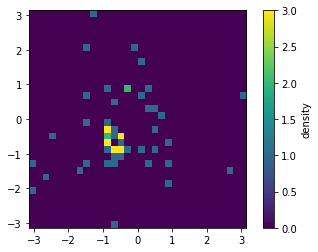

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

#input
pi=3.14159

def convert_event_to_image(bin_count,event_item,draw_plot=False):
    event_v = np.vstack(event_item)
    counts, xedges, yedges = np.histogram2d(event_v[:,0], event_v[:,1], bins=bin_count)
    if draw_plot:
#        plt.imshow(counts, interpolation='nearest', origin='lower',
#            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
        plt.imshow(counts, interpolation='nearest', origin='lower',
            extent=[-pi, pi, -pi, pi])
        cb = plt.colorbar()
        cb.set_label("density")
    #print(counts)
    return counts

bin_count=32
event_item_sample=event_items_matter[0]
event_item_sample_image=convert_event_to_image(bin_count,event_item_sample,True)
print(type(event_item_sample_image), event_item_sample_image.size, event_item_sample_image.shape)


**Converting all events into image data structure**

In [ ]:
def convert_events_to_images(image_grid_count,event_items):
    event_items_image = np.array(np.zeros((1,image_grid_count,image_grid_count)))
    is_first_cell_zero=True
    for event_item in event_items:
        event_item_image=convert_event_to_image(image_grid_count,event_item,False)
        if is_first_cell_zero:
            event_items_image[0]=event_item_image
            is_first_cell_zero=False
        else:
            event_items_image=np.insert(event_items_image,0,event_item_image,axis=0)
    return event_items_image
 
event_items=event_items_matter
image_grid_count=32

event_items_image_matter=convert_events_to_images(image_grid_count,event_items_matter)  
event_items_image_matter_lbt=convert_events_to_images(image_grid_count,event_items_matter_lbt) 


print(type(event_items_image_matter), event_items_image_matter.size, event_items_image_matter.shape)
print(type(event_items_image_matter_lbt), event_items_image_matter_lbt.size, event_items_image_matter_lbt.shape)

**Construncting proportional train and test sets** by events' images

In [ ]:
def get_data_splitting_index(slice_total,slice_train,data_size):
    slice_test=slice_total-slice_train
    data_splitting_index=int(data_size*(slice_train/slice_total))
    return data_splitting_index
def get_x_train_test_data_by_proportion(slice_total,slice_train,data):
    data_size=len(data)
    data_splitting_index=get_data_splitting_index(slice_total,slice_train,data_size)
    x_train=data[0:data_splitting_index]
    x_test=data[data_splitting_index:data_size]
    return (x_train,x_test)

# slice_total=5
# slice_train=4

slice_total=10
slice_train=9

(x_train_matter,x_test_matter)=get_x_train_test_data_by_proportion(slice_total,slice_train,event_items_image_matter)
(x_train_matter_lbt,x_test_matter_lbt)=get_x_train_test_data_by_proportion(slice_total,slice_train,event_items_image_matter_lbt)

print("x_train_matter:",type(x_train_matter), x_train_matter.size, x_train_matter.shape)
print("x_test_matter:",type(x_test_matter), x_test_matter.size, x_test_matter.shape)
print("x_train_matter_lbt:",type(x_train_matter_lbt), x_train_matter_lbt.size, x_train_matter_lbt.shape)
print("x_test_matter_lbt:",type(x_test_matter_lbt), x_test_matter_lbt.size, x_test_matter_lbt.shape)

x_train_matter: <class 'numpy.ndarray'> 819200 (800, 32, 32)
x_test_matter: <class 'numpy.ndarray'> 204800 (200, 32, 32)
x_train_matter_lbt: <class 'numpy.ndarray'> 819200 (800, 32, 32)
x_test_matter_lbt: <class 'numpy.ndarray'> 204800 (200, 32, 32)


**Concatenate list of prortional data and create X side of the dataset**

In [ ]:
def concatenate_x_dataset_by_proportion_items(proportion_items):
    x_dataset=np.array(np.zeros((1,32,32)))
    is_first_cell_zero=True
    for proportion_item in proportion_items:
        if is_first_cell_zero:
            x_dataset=proportion_items[0]
            is_first_cell_zero=False
        else:
            x_dataset=np.insert(x_dataset,0,proportion_item,axis=0)
            
    return x_dataset

x_train_proportion_items=[x_train_matter,x_train_matter_lbt]
x_train=concatenate_x_dataset_by_proportion_items(x_train_proportion_items)

x_test_proportion_items=[x_test_matter,x_test_matter_lbt]
x_test=concatenate_x_dataset_by_proportion_items(x_test_proportion_items)

print("x_train:",type(x_train), x_train.size, x_train.shape)
print("x_test:",type(x_test), x_test.size, x_test.shape)

x_train: <class 'numpy.ndarray'> 1638400 (1600, 32, 32)
x_test: <class 'numpy.ndarray'> 409600 (400, 32, 32)


**Building Y side of the dataset**

In [ ]:
def dataset_y_builder(y_size,y_class_label_items):
    class_size=int(y_size/len(y_class_label_items))
    y=[]
    for class_label_item in y_class_label_items:
        y = np.append (y, [class_label_item]*class_size)
    return y

def build_y_train_test_data_by_proportion(slice_total,slice_train,y_class_label_items, data_size):
    train_size=get_data_splitting_index(slice_total,slice_train,data_size)
    test_size=data_size-train_size
    y_train=dataset_y_builder(train_size,y_class_label_items)
    y_test=dataset_y_builder(test_size,y_class_label_items)
    return (y_train,y_test)


data_size=2000
y_class_label_items=['MVAC','MLBT']
(y_train,y_test)=build_y_train_test_data_by_proportion(slice_total,slice_train,y_class_label_items, data_size)
print("y_train:",type(y_train), y_train.size, y_train.shape)
print("y_test:",type(y_test), y_test.size, y_test.shape)

y_train: <class 'numpy.ndarray'> 1600 (1600,)
y_test: <class 'numpy.ndarray'> 400 (400,)


**Saving Constructed Benchmark Dataset as a file**

In [ ]:
import pickle

from google.colab import drive
drive.mount('/content/drive')
dataset_directory_path='/content/drive/MyDrive/Projects/110_JetscapeMl/Hm.JetscapeMl.Data/'

#file_directory_path= 'G:\\My Drive\\Projects\\110_JetscapeMl\\Hm.JetscapeMl.Data\\'

def saveDataset(file_name,dataset):
    with open(file_name, 'wb') as dataset_file:
        pickle.dump(dataset,dataset_file, protocol=pickle.HIGHEST_PROTOCOL)
        
# file_name='jetscape-ml-benchmark-dataset-matter-vs-lbt-2k.pkl'
file_name='jetscape-ml-benchmark-dataset-matter-vs-lbt-200K.pkl'
dataset=((x_train,y_train),(x_test,y_test))
saveDataset(dataset_directory_path+file_name,dataset)